In [1]:
# Data cleaning for CT Pretrial Detainees
# (Springboard Capstone 1)
# 2018, Misty M. Giles

%matplotlib inline
from collections import Counter
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd

In [2]:
file = 'Accused_Pre-Trial_Inmates_in_Correctional_Facilities.csv'
#file = 'detainees_2016_07.csv'

# Read data in and update the columns to lower case and replace spaces with _s.
df = pd.read_csv(file, parse_dates=['DOWNLOAD DATE', 'LATEST ADMISSION DATE'])
df.columns = ['download_date', 'identifier', 'latest_admission_date', 'race', 
              'gender', 'age', 'bond_amount', 'offense', 'facility', 'detainer']

# Check the first rows to ensure that the data is expected.
print(df.head())

# Check .info() to see if the dtypes are appropriate.
print(df.info())

  download_date identifier latest_admission_date      race gender  age  \
0    2016-07-01   ZZEBBEWZ            2016-06-17     WHITE      M   63   
1    2016-07-01   ZZEBBRZC            2016-06-30     BLACK      M   42   
2    2016-07-01   ZZEBCBHC            2016-06-06     WHITE      M   60   
3    2016-07-01   ZZEBCCWL            2016-04-25  HISPANIC      M   44   
4    2016-07-01   ZZEBCHBZ            2016-06-21  HISPANIC      M   58   

   bond_amount                                   offense     facility detainer  
0         5000  ASSAULT, THIRD DEGREE                 AM  CORRIGAN CI     NONE  
1          500  FAILURE TO APPEAR, SECOND DEGREE      AM  HARTFORD CC     NONE  
2        40000  EVADING RESPONSIBILITY                 M  HARTFORD CC     NONE  
3       125000  CRIMINAL POSSESSION OF A PISTOL       DF  HARTFORD CC     NONE  
4         2500  BREACH OF PEACE                       BM  CORRIGAN CI     NONE  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2677123 entries, 0 

In [3]:
# Change race, gender, facility, and detainer to category type and verify.
df.race = df.race.astype('category')
df.gender = df.gender.astype('category')
df.facility = df.facility.astype('category')
df.detainer = df.detainer.astype('category')
# Separate the last two letters of the offense to get the offense class, if classed.
df['offense_class'] = [off[38:] for off in df.offense]
df.offense_class = df.offense_class.astype('category')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2677123 entries, 0 to 2677122
Data columns (total 11 columns):
download_date            datetime64[ns]
identifier               object
latest_admission_date    datetime64[ns]
race                     category
gender                   category
age                      int64
bond_amount              int64
offense                  object
facility                 category
detainer                 category
offense_class            category
dtypes: category(5), datetime64[ns](2), int64(2), object(2)
memory usage: 135.3+ MB
None


In [4]:
# Check the numbers of the categories. 
print(df.race.nunique())
print(df.gender.nunique())
print(df.facility.nunique())
print(df.detainer.nunique())
print(df.offense_class.nunique())

# Check the expected values of the categories.
# .tolist() used to show entire list as needed.
print(df.race.values.unique())
print(df.gender.values.unique())
print(df.facility.values.unique().tolist())
print(df.detainer.values.unique().tolist())
print(df.offense_class.values.unique().tolist())

print(df.count())

5
2
50
9
16
[WHITE, BLACK, HISPANIC, ASIAN, AMER IND]
Categories (5, object): [WHITE, BLACK, HISPANIC, ASIAN, AMER IND]
[M, F]
Categories (2, object): [M, F]
['CORRIGAN CI', 'HARTFORD CC', 'YORK CI', 'NEW HAVEN CC', 'BRIDGEPORT CC', 'GARNER', 'MACDOUGALL', 'WALKER RC', 'NORTHERN CI', 'CHESHIRE CI', 'OSBORN CI', 'MANSON YI', 'MH-WHITING', 'FEDERAL MARSHAL', 'D KIMBALL HSP', 'ROBINSON CI', 'ST MARYS HOSP', 'MH-CVH', 'ENFIELD CI', 'HARTFORD HOSP', 'WILLARD-CYBULSKI CI', 'UCONN HOSP', 'ST VINC HOSP', 'LAWRENCE HOSP', 'WATERBRY HOSP', 'MEDICAL HOSP', 'YALE/N.H.HOSP', 'JOHNSON HOSP', 'MH-YALE/N.H.', 'MH-ST MARY', 'BROOKLYN CI', 'DANBURY HOSP', 'BACKUS HOSP', 'RADGOWSKI', 'ST FRAN HOSP', 'PO-GARIBALDI', 'BRIDGEPORT HOSP', 'PO-WILLIAMS', 'PO-CARRINGTON', '4YV', 'ST RAPH HOSP', 'MH-HTFD HOSP', 'CONSIGN @ NY', 'MH-ST FRANCIS', 'MH-UCONN', 'PO-FERRARO', 'NORWALK HOSP', 'MH-ST RAPHAEL', 'MID-STATE HOSP', 'MER-WALL HOSP']
['NONE', 'SPECIAL PAROLE', 'FEDERAL', 'STATE OF CT', 'OTHER STATE', 'IMMIGRAT

In [5]:
# Do the time math for the days spent on each row.
df['days'] = df.download_date - df.latest_admission_date

In [6]:
print(df.bond_amount.max())
print(df.bond_amount.min())
print(df.bond_amount.median())

print(df[['identifier', 'bond_amount', 'offense', 'detainer']].loc[df.offense.str.endswith('M')].sort_values(by='bond_amount', ascending=False).drop_duplicates().to_string())

9200000
1
90000.0
        identifier  bond_amount                                   offense        detainer
1335972   ZZSRRWCL      5000000  DISORDERLY CONDUCT                    CM     STATE OF CT
2320536   ZZSEHRWS      1515000  FAILURE TO APPEAR, SECOND DEGREE      AM            NONE
2113771   ZZSEHRWS      1500000  FAILURE TO APPEAR, SECOND DEGREE      AM            NONE
1946683   ZZRWJHLH      1080000  LARCENY, SIXTH DEGREE                 CM            NONE
779347    ZZSECBEZ      1025000  MANUF OR POSSESSION OF BURGLAR TOOLS  AM            NONE
1798877   ZZHSRLLJ      1004150  CRIMINALLY NEGLIGENT HOMICIDE         AM            NONE
1706701   ZZHSRLLJ      1003000  CRIMINALLY NEGLIGENT HOMICIDE         AM            NONE
1632398   ZZHSRLLJ      1001500  CRIMINALLY NEGLIGENT HOMICIDE         AM            NONE
1580165   ZZSRZSLE      1000150  VIOLATE COND OF RELEASE-2ND DEG       AM            NONE
1570969   ZZHSRLLJ      1000000  CRIMINALLY NEGLIGENT HOMICIDE         AM         

In [7]:
df[['identifier', 'bond_amount', 'offense', 'latest_admission_date', 'download_date', 'detainer']].loc[df.identifier == 'ZZSRRWCL']

,identifier,bond_amount,offense,latest_admission_date,download_date,detainer
1328129,ZZSRRWCL,5000000,DISORDERLY CONDUCT CM,2017-09-22,2017-09-23,STATE OF CT
1330731,ZZSRRWCL,5000000,DISORDERLY CONDUCT CM,2017-09-22,2017-09-24,STATE OF CT
1335972,ZZSRRWCL,5000000,DISORDERLY CONDUCT CM,2017-09-22,2017-09-25,STATE OF CT
1340399,ZZSRRWCL,500000,"ASSAULT, FIRST DEGREE BF",2017-09-22,2017-09-26,NONE
1343477,ZZSRRWCL,500000,"ASSAULT, FIRST DEGREE BF",2017-09-22,2017-09-27,NONE
1345200,ZZSRRWCL,500000,"ASSAULT, FIRST DEGREE BF",2017-09-22,2017-09-28,NONE
1348915,ZZSRRWCL,500000,"ASSAULT, FIRST DEGREE BF",2017-09-22,2017-09-29,NONE
1351941,ZZSRRWCL,500000,"ASSAULT, FIRST DEGREE BF",2017-09-22,2017-09-30,NONE
1355821,ZZSRRWCL,500000,"ASSAULT, FIRST DEGREE BF",2017-09-22,2017-10-01,NONE
1359461,ZZSRRWCL,500000,"ASSAULT, FIRST DEGREE BF",2017-09-22,2017-10-02,NONE


In [8]:
df[['identifier', 'bond_amount', 'offense', 'latest_admission_date', 'download_date', 'detainer']].loc[df.identifier == 'ZZSEHRWS']

,identifier,bond_amount,offense,latest_admission_date,download_date,detainer
1862818,ZZSEHRWS,1500000,"ASSAULT, FIRST DEGREE BF",2018-03-16,2018-03-17,NONE
1868117,ZZSEHRWS,1500000,"ASSAULT, FIRST DEGREE BF",2018-03-16,2018-03-18,NONE
1869996,ZZSEHRWS,1500000,"ASSAULT, FIRST DEGREE BF",2018-03-16,2018-03-19,NONE
1872081,ZZSEHRWS,1500000,"ASSAULT, FIRST DEGREE BF",2018-03-16,2018-03-20,NONE
1876483,ZZSEHRWS,1500000,"ASSAULT, FIRST DEGREE BF",2018-03-16,2018-03-21,NONE
1880658,ZZSEHRWS,1500000,"ASSAULT, FIRST DEGREE BF",2018-03-16,2018-03-22,NONE
1883109,ZZSEHRWS,1500000,"ASSAULT, FIRST DEGREE BF",2018-03-16,2018-03-23,NONE
1885643,ZZSEHRWS,1500000,"ASSAULT, FIRST DEGREE BF",2018-03-16,2018-03-24,NONE
1889551,ZZSEHRWS,1500000,"ASSAULT, FIRST DEGREE BF",2018-03-16,2018-03-25,NONE
1894061,ZZSEHRWS,1500000,"ASSAULT, FIRST DEGREE BF",2018-03-16,2018-03-26,NONE


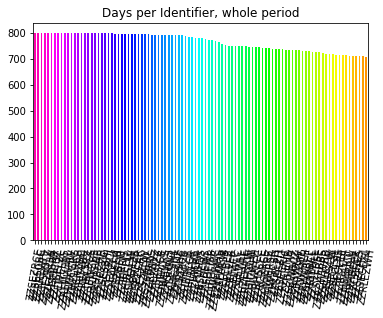

In [9]:
color = cm.hsv(np.linspace(.9,.1, 100))
df.identifier.value_counts()[:100].plot(title='Days per Identifier, whole period',
                                kind='bar', color=color, rot=80);

In [10]:
identifiers = df.groupby(['identifier', 'latest_admission_date'])
#identifiers = df.groupby(['identifier', 'latest_admission_date', 'offense', 'offense_class'])
#identifiers.offense.nunique()
#identifiers.bond_amount.nunique()
#identifiers.index.names

In [11]:
test = pd.DataFrame(identifiers.download_date.max())
test['bond_amount'] = identifiers.bond_amount.median() # Won't work for the <$100 placeholders.  Filter?
test['bond_changes'] = identifiers.bond_amount.nunique()
test['days'] = identifiers.days.max()
test['race'] = identifiers.race.nunique() 
#test['gender'] = NEED MODE.  COUNTER()?
test['age'] = identifiers.age.min()  # Age at arrest, going on trust here.
#test['offense'] = NEED THE OFFENSE AS OF THE DOWNLOAD DATE
#test['offense_class'] = NEED LAST VALUE
#test['facility'] = DO I NEED THIS AT ALL?
#test['detainer'] = NEED LAST VALUE

#'race', 
#              'gender', 'age', 'bond_amount', 'offense', 'facility', 'detainer'


# Need to groupby identifier, latest_admission_date.  Then take the max download_date and fill the columns from that row.
# Example: ZZZWJZEB
# Also need to remove latest_admission_date < 2015(?) and remove those still awaiting trial on 2018-11-11.

#identifiers.index

In [12]:
test.info()
test

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 40147 entries, (ZZEBBBCS, 2018-08-21 00:00:00) to (ZZZWZWBH, 2016-06-28 00:00:00)
Data columns (total 6 columns):
download_date    40147 non-null datetime64[ns]
bond_amount      40147 non-null float64
bond_changes     40147 non-null int64
days             40147 non-null timedelta64[ns]
race             40147 non-null int64
age              40147 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), timedelta64[ns](1)
memory usage: 2.2+ MB


download_date  bond_amount  bond_changes  \
identifier latest_admission_date                                            
ZZEBBBCS   2018-08-21               2018-09-27     900000.0             1   
ZZEBBBJW   2016-08-24               2016-10-21      15000.0             1   
           2017-07-06               2017-07-13     100000.0             1   
           2018-09-27               2018-11-11      50000.0             1   
ZZEBBBSZ   2016-10-07               2016-10-11       2500.0             1   
ZZEBBBZJ   2017-09-12               2017-09-13      20000.0             1   
           2018-04-24               2018-05-09     150000.0             1   
ZZEBBBZL   2017-02-14               2017-03-01       1000.0             1   
ZZEBBCJC   2018-05-21               2018-06-01       5000.0             1   
ZZEBBCRW   2018-10-10               2018-11-11      20000.0             1   
ZZEBBCRZ   2017-12-29               2018-01-02       2500.0             1   
           2018-03-21               2018-03-22       2500.0             1   
           2018-04-12               2018-07-17      85000.0             2   
ZZEBBEBS   2018-07-09               2018-07-23       5000.0             1   
ZZEBBEWB   2018-03-16               2018-05-22      25500.0             3   
           2018-08-16               2018-09-06       3050.0             2   
           2018-09-21               2018-11-11     150250.0             2   
ZZEBBEWZ   2016-06-17               2016-07-13       5000.0             1   
ZZEBBHER   2016-11-09               2016-12-06        500.0             1   
           2016-12-15               2017-01-05      10250.0             2   
           2017-01-30               2017-04-17      19050.0             2   
ZZEBBHJE   2017-07-10               2017-07-11        900.0             1   
ZZEBBHWH   2017-05-01               2018-11-11     500000.0             1   
ZZEBBHWJ   2016-07-14               2016-12-07       6000.0             2   
ZZEBBHWR   2016-08-04               2016-09-19      50000.0             1   
ZZEBBHZL   2017-03-29               2017-04-19      15500.0             1   
ZZEBBLCB   2017-12-13               2018-01-22       6000.0             4   
           2018-10-25               2018-11-11      10000.0             2   
ZZEBBLLL   2017-02-08               2017-08-15      15400.0             3   
           2018-02-15               2018-04-13      90000.0             1   
...                                        ...          ...           ...   
ZZZWCSWR   2017-11-06               2017-11-13     225000.0             2   
ZZZWCZLS   2015-09-03               2017-02-23     102500.0             1   
ZZZWEHCH   2017-07-14               2017-08-02      50000.0             1   
ZZZWELZE   2015-07-14               2018-06-06     500000.0             1   
ZZZWEWJR   2016-09-09               2016-09-12       2000.0             1   
ZZZWHCZZ   2016-12-15               2017-06-26      70000.0             1   
ZZZWHRWR   2017-04-10               2017-07-07      20000.0             1   
ZZZWJCES   2018-02-06               2018-11-11      75000.0             1   
ZZZWJRSC   2016-06-09               2016-07-26       2500.0             1   
ZZZWJSHH   2017-05-09               2017-06-14     150000.0             1   
ZZZWJWZJ   2018-04-09               2018-06-20      55500.0             2   
ZZZWJZBB   2018-05-15               2018-06-01      25000.0             2   
           2018-11-01               2018-11-11      90000.0             1   
ZZZWJZBL   2018-03-06               2018-03-09       1500.0             1   
           2018-06-05               2018-07-03      10500.0             1   
ZZZWJZEB   2016-11-07               2016-12-22      20000.0             1   
ZZZWJZHR   2017-10-05               2017-10-10      25000.0             1   
           2018-07-05               2018-11-11     520000.0             1   
ZZZWLCEB   2018-03-20               2018-06-07      75000.0             1   
ZZZWLEWB   2015-02-17        